In [38]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
train_csv="./data/train.csv"
test_csv="./data/test.csv"

train=pd.read_csv(train_csv, nrows = 1000000) #Sample only subset since dataset is very large
test=pd.read_csv(test_csv, nrows = 1000000)

In [17]:
train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [29]:
#train.info()
train = train.dropna() #Very few data entries are n/a so doesn't make a huge difference to drop them

In [23]:
#First convert from datetime object to pandas datetime obejct

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format='%Y%m%d')


In [28]:
#Seperate datetime object into year/month/day/hour

train['pickup_year'] = pd.DatetimeIndex(train['pickup_datetime']).year
train['pickup_month'] = pd.DatetimeIndex(train['pickup_datetime']).month
train['pickup_day'] = pd.DatetimeIndex(train['pickup_datetime']).day
train['pickup_day_of_week'] = pd.DatetimeIndex(train['pickup_datetime']).dayofweek
train['pickup_hour'] = pd.DatetimeIndex(train['pickup_datetime']).hour

train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1


<AxesSubplot:xlabel='pickup_year'>

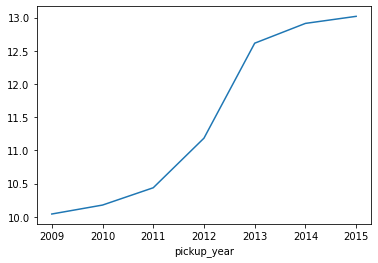

In [33]:
train.groupby('pickup_year')['fare_amount'].mean().plot()

<AxesSubplot:xlabel='pickup_month'>

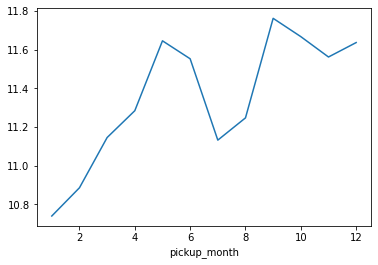

In [34]:
train.groupby('pickup_month')['fare_amount'].mean().plot()

<AxesSubplot:xlabel='pickup_day'>

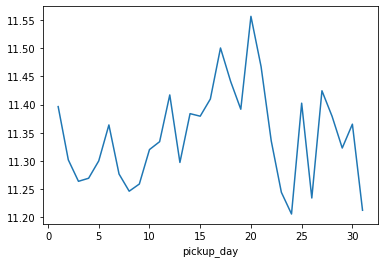

In [35]:
train.groupby('pickup_day')['fare_amount'].mean().plot()

<AxesSubplot:xlabel='pickup_day_of_week'>

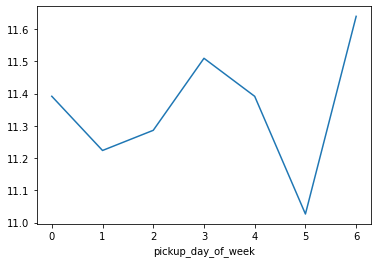

In [36]:
train.groupby('pickup_day_of_week')['fare_amount'].mean().plot()

<AxesSubplot:xlabel='pickup_hour'>

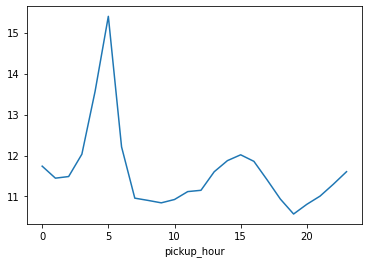

In [37]:
train.groupby('pickup_hour')['fare_amount'].mean().plot()

#Fares have risen in the past couple of years
#Fares are the lowest on staurday and highest on subday --> seems odd
#Fares are highest in the morning around 5 and another peak around 15 and 24

# Data cleaning

<AxesSubplot:>

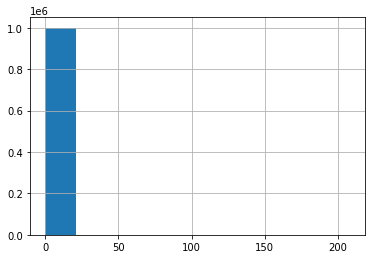

In [68]:
train['passenger_count'].hist() #pandas plot
#plt.hist(train['passenger_count'], bins=3)

In [69]:
#train.boxplot(column='passenger_count', showfliers=False)
max(train['passenger_count'])

208